In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
states = {'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Federated States of Micronesia': 'FM',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Marshall Islands': 'MH',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Palau': 'PW',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virgin Islands': 'VI',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY', " ": ""}

In [3]:
def state_name_to_code(statename):
    return states[statename]

In [4]:
power_plant_df = pd.read_csv("power_plants.csv")
power_plant_df.head()

,longitude,latitude,plant_name,utility_name,sector_name,city,county,state_name,primary_source,total_power,source_description,tech_description
0,-87.356823,33.458665,Bankhead Dam,Alabama Power Co,Electric Utility,Northport,as,Alabama,hydroelectric,56.0,g,Conventional Hydroelectric
1,-88.010300,31.006900,Barry,Alabama Power Co,Electric Utility,Bucks,Mobile,Alabama,coal,2160.5,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...
2,-86.283056,32.583889,Walter Bouldin Dam,Alabama Power Co,Electric Utility,Wetumpka,Elmore,Alabama,hydroelectric,225.9,Hydroelectric = 225.9 MW,Conventional Hydroelectric
3,-85.970800,34.012800,Gadsden,Alabama Power Co,Electric Utility,Gadsden,Etowah,Alabama,natural gas,130.0,Natural Gas = 130 MW,Natural Gas Steam Turbine
4,-87.196486,33.644344,Gorgas,Alabama Power Co,Electric Utility,Parrish,Walker,Alabama,coal,1034.0,Coal = 1034 MW,Conventional Steam Coal


In [5]:
a = power_plant_df["primary_source"] == "coal" 
b = power_plant_df["primary_source"] == "natural gas" 
c = power_plant_df["primary_source"] == "petroleum" 

In [6]:
cc = a | b | c

In [7]:
coal_pp_df = power_plant_df[a]
coal_pp_df = coal_pp_df.dropna()
coal_pp_df["state_name"] = coal_pp_df["state_name"].apply(state_name_to_code)
coal_pp_df = coal_pp_df.reset_index().iloc[:, 1:]

In [8]:
coal_pp_df.head()

,longitude,latitude,plant_name,utility_name,sector_name,city,county,state_name,primary_source,total_power,source_description,tech_description
0,-88.010300,31.006900,Barry,Alabama Power Co,Electric Utility,Bucks,Mobile,AL,coal,2160.5,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...
1,-87.196486,33.644344,Gorgas,Alabama Power Co,Electric Utility,Parrish,Walker,AL,coal,1034.0,Coal = 1034 MW,Conventional Steam Coal
2,-86.458056,33.244211,E C Gaston,Alabama Power Co,Electric Utility,Wilsonville,Shelby,AL,coal,1878.0,"Coal = 1606 MW, Natural Gas = 256 MW, Petroleu...",Conventional Steam Coal; Natural Gas Steam Tur...
3,-93.569167,32.030556,Dolet Hills,Cleco Power LLC,Electric Utility,Mansfield,DeSoto,LA,coal,641.0,Coal = 641 MW,Conventional Steam Coal
4,-87.910747,31.488019,Charles R Lowman,PowerSouth Energy Cooperative,Electric Utility,Leroy,Washington,AL,coal,556.0,Coal = 556 MW,Conventional Steam Coal


In [9]:
coal_pp_df.to_csv("coal_power_plant.csv")

In [10]:
petro_pp_df = power_plant_df[c]
petro_pp_df = petro_pp_df.dropna()
petro_pp_df["state_name"] = petro_pp_df["state_name"].apply(state_name_to_code)
petro_pp_df = petro_pp_df.reset_index().iloc[:, 1:]
petro_pp_df.to_csv("petro_power_plant.csv")

In [11]:
df = pd.read_csv("seds.csv")

In [12]:
non_renewable_pp = power_plant_df[a|b|c].groupby("state_name")["plant_name"].count()
renewable_pp = power_plant_df[~ (a|b|c)].groupby("state_name")["plant_name"].count()
non_renewable_pp

state_name
                    1
Alabama            31
Alaska            111
Arizona            38
Arkansas           25
California        296
Colorado           45
Connecticut        62
Delaware           13
Florida            79
Georgia            58
Hawaii              0
Idaho              10
Illinois          128
Indiana            48
Iowa              142
Kentucky           27
Louisiana          59
Maine              13
Maryland           29
Massachusetts      55
Michigan          101
Minnesota         105
Mississippi        33
Missouri           86
Montana            11
Nebraska           64
Nevada             22
New Hampshire      11
New Jersey         57
New Mexico         30
New York          117
North Carolina     76
North Dakota       20
Ohio               92
Oklahoma           42
Oregon             14
Pennsylvania       97
Rhode Island        9
South Carolina     38
South Dakota       18
Tennessee          18
Texas             186
Utah               30
Vermont             8

In [13]:
df2 = DataFrame(columns = ["renewable_pp", "nonrenewable_pp"])
df2["renewable_pp"] = renewable_pp
df2["nonrenewable_pp"] = non_renewable_pp 
df2 = df2.reset_index()
df2["state_name"] = df2["state_name"].apply(state_name_to_code)
df2 = df2.fillna(0)
df2 = df2.set_index("state_name")
df2 = df2.iloc[1:, :]

In [14]:
df2.to_csv("power_plants_by_state.csv")

In [15]:
asma = pd.read_csv("asthma_by_state_00_16.csv")

In [16]:
asma.groupby("state_data")["year"].count() == 17

state_data
AK               True
AL               True
AR               True
AZ               True
CA               True
CO               True
CT               True
DC               True
DE               True
FL               True
GA               True
HI              False
IA               True
ID               True
IL               True
IN               True
KS               True
KY               True
LA               True
MA               True
MD               True
ME               True
MI               True
MN               True
MO               True
MS               True
MT               True
NC               True
ND               True
NE               True
NH               True
NJ               True
NM               True
NV               True
NY               True
OH               True
OK               True
OR               True
PA               True
RI               True
SC               True
SD               True
TN               True
TX               True
Territories     False

In [17]:
energy_consumption = pd.read_csv("energy_consumption.csv")
energy_consumption = energy_consumption[energy_consumption["state_code"] != "US"]
energy_consumption["Non-renewable Consumption(BTU)"] = np.log(energy_consumption["Non-renewable Consumption(BTU)"] )
energy_consumption
ecnrc = energy_consumption[["state_code", "Non-renewable Consumption(BTU)", "year", "state_name"]]
maxx = ecnrc.groupby("state_code").max()["Non-renewable Consumption(BTU)"]
minn = ecnrc.groupby("state_code").min()["Non-renewable Consumption(BTU)"]
ecnrc = ecnrc.set_index("state_code")
ecnrc["Non-renewable Consumption(BTU)"] = (ecnrc["Non-renewable Consumption(BTU)"] - minn) / (maxx - minn)
ecnrc

ecnrc.to_csv("standardized_nonrenewable_consumption_by_state.csv")
#(ecnrc.groupby("state_code").min()) / (ecnrc.groupby("state_code").max() - ecnrc.groupby("state_code").min())
#energy_consumption.groupby(["state_code"])["Renewable Consumption(BTU)"].max()

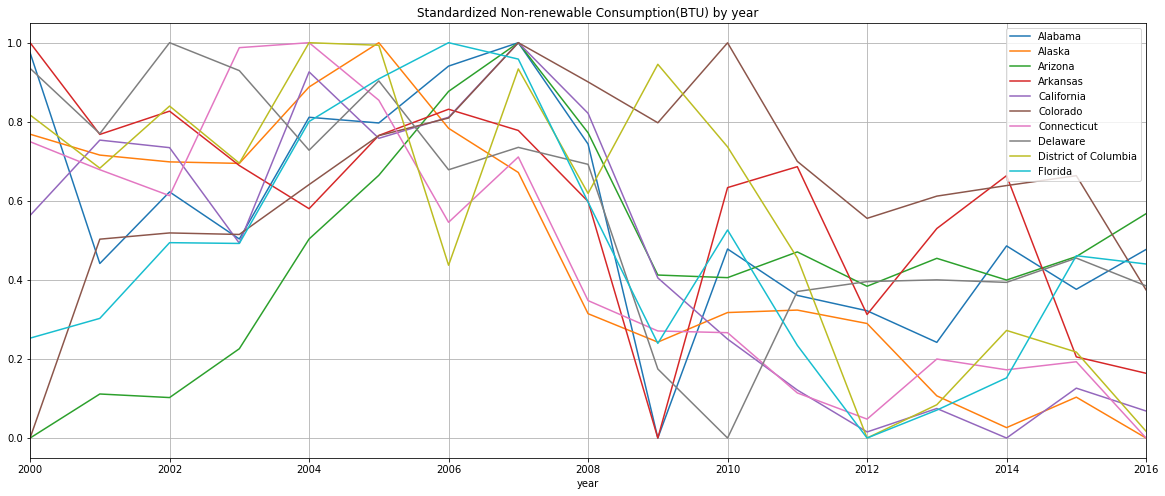

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
tt = 0
for label, dff in ecnrc.groupby(["state_name"]):
    tt +=1
    if(tt >= 1 and tt <= 10):
        dff.plot(ax=ax, label=label, x = "year", y = "Non-renewable Consumption(BTU)")
ax.set_title("Standardized Non-renewable Consumption(BTU) by year")
ax.grid(True)

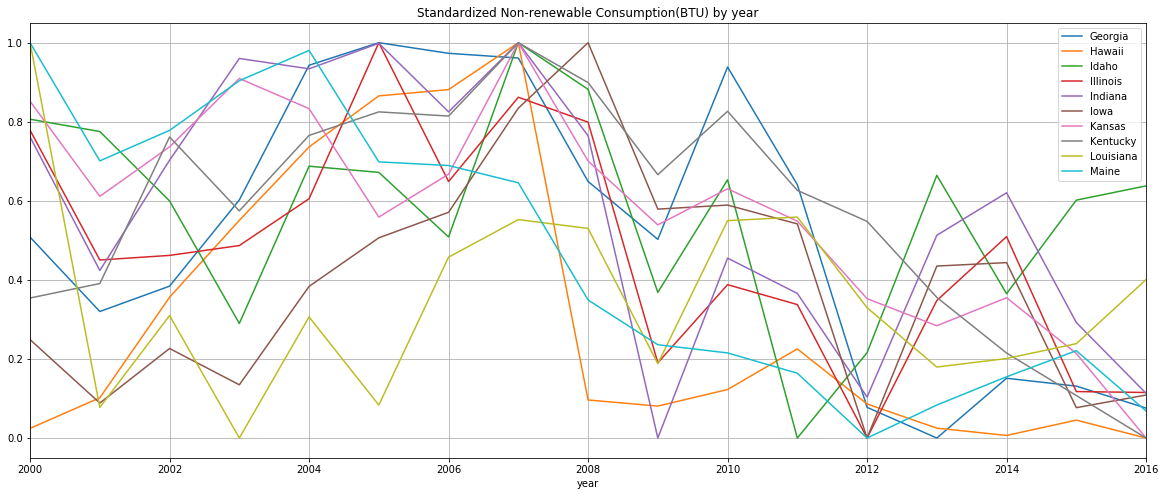

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
tt = 0
for label, dff in ecnrc.groupby(["state_name"]):
    tt +=1
    if(tt >= 11 and tt <= 20):
        dff.plot(ax=ax, label=label, x = "year", y = "Non-renewable Consumption(BTU)")
ax.set_title("Standardized Non-renewable Consumption(BTU) by year")
ax.grid(True)

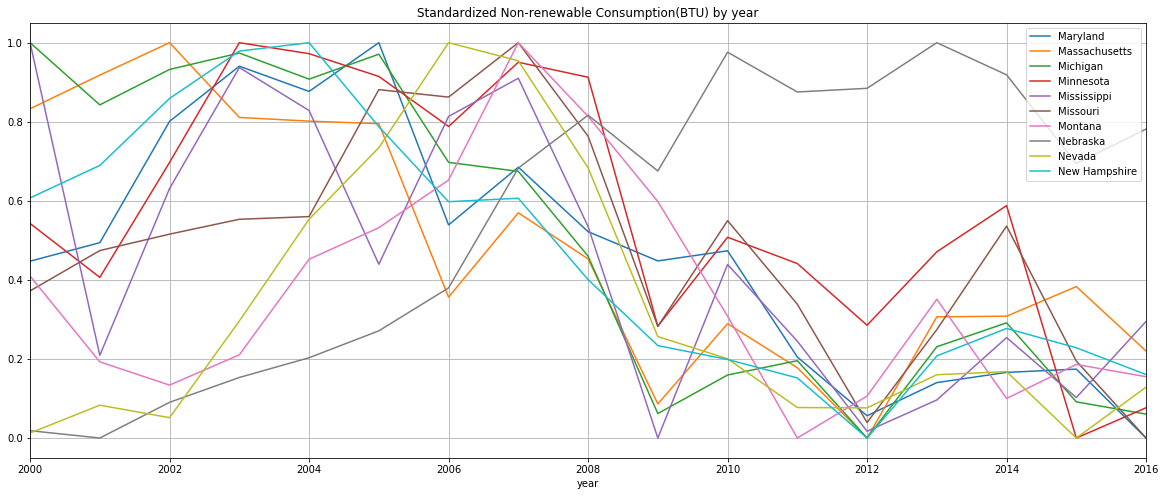

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
tt = 0
for label, dff in ecnrc.groupby(["state_name"]):
    tt +=1
    if(tt >= 21 and tt <= 30):
        dff.plot(ax=ax, label=label, x = "year", y = "Non-renewable Consumption(BTU)")
        
ax.set_title("Standardized Non-renewable Consumption(BTU) by year")
ax.grid(True)

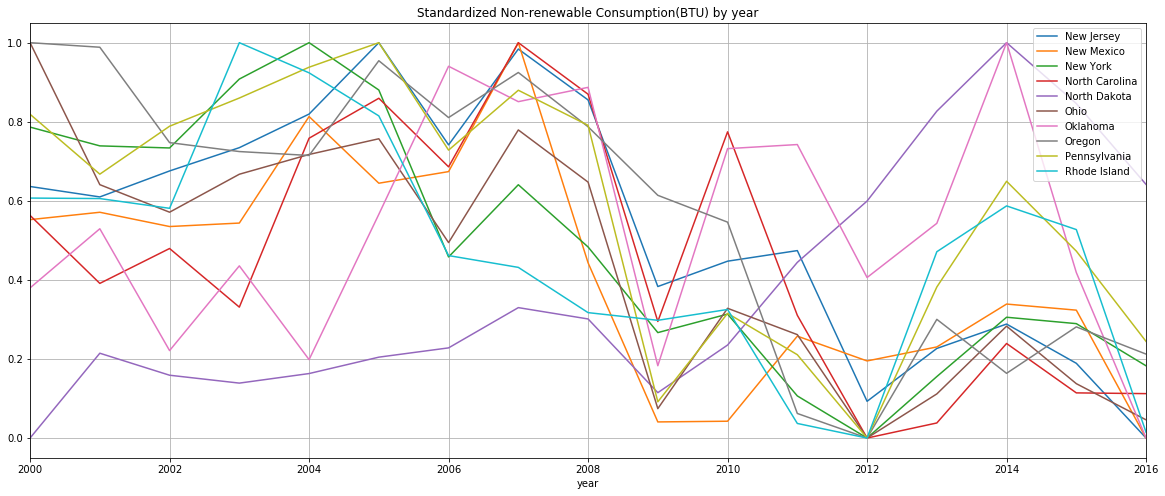

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
tt = 0
for label, dff in ecnrc.groupby(["state_name"]):
    tt +=1
    if(tt >= 31 and tt <= 40):
        dff.plot(ax=ax, label=label, x = "year", y = "Non-renewable Consumption(BTU)")
        
ax.set_title("Standardized Non-renewable Consumption(BTU) by year")
ax.grid(True)

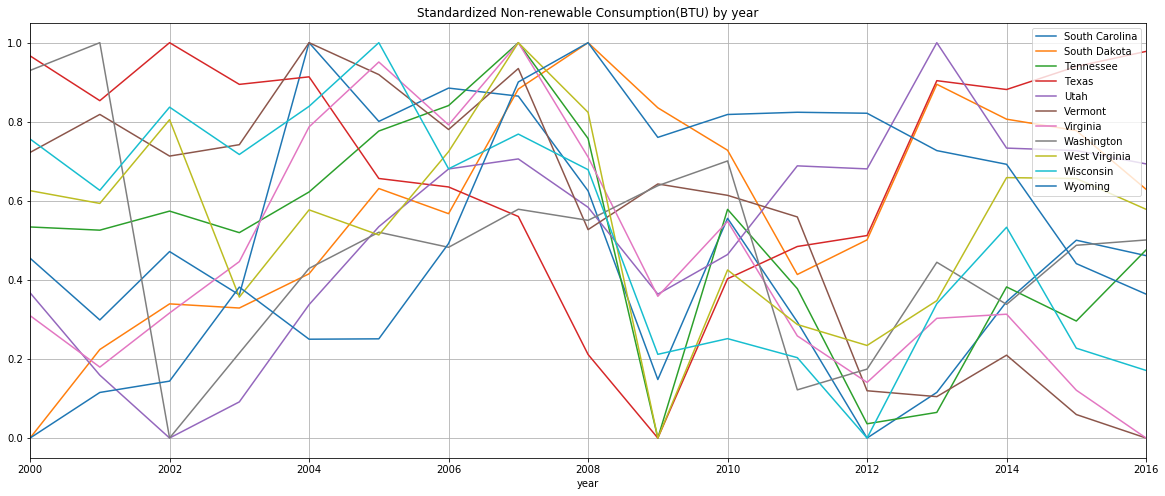

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
tt = 0
for label, dff in ecnrc.groupby(["state_name"]):
    tt +=1
    if(tt >= 41 and tt <= 60):
        dff.plot(ax=ax, label=label, x = "year", y = "Non-renewable Consumption(BTU)")
        
ax.set_title("Standardized Non-renewable Consumption(BTU) by year")
ax.grid(True)
ax.legend(loc = 1)

In [23]:
sm.tsa.stattools.adfuller(ecnrc.loc["WY", "Non-renewable Consumption(BTU)"])

/Users/avit/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


(-0.0,
 0.958532086060056,
 8,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 -541.5002077115201)

In [62]:
dfcpa = pd.read_csv("consumption_per_area.csv")
dfcpa = dfcpa.set_index("state_code")
dfcpa.head()
dfcpa

,Unnamed: 0,year,state_name,Renewable Consumption(BTU),unit,Non-renewable Consumption(BTU),area_data,Renewable Consumption per Area,Non-renewable Consumption per Area
state_code,,,,,,,,,
AK,0,2000,Alaska,12375.0,Billion Btu,729763.0,1723337,0.007181,0.423459
AK,1,2001,Alaska,17439.0,Billion Btu,718381.0,1723337,0.010119,0.416855
AK,2,2002,Alaska,18257.0,Billion Btu,714716.0,1723337,0.010594,0.414728
AK,3,2003,Alaska,19598.0,Billion Btu,713902.0,1723337,0.011372,0.414256
AK,4,2004,Alaska,18857.0,Billion Btu,756181.0,1723337,0.010942,0.438789
AK,5,2005,Alaska,15866.0,Billion Btu,781834.0,1723337,0.009207,0.453674
AK,6,2006,Alaska,13298.0,Billion Btu,733018.0,1723337,0.007716,0.425348
AK,7,2007,Alaska,14037.0,Billion Btu,709032.0,1723337,0.008145,0.411430
AK,8,2008,Alaska,12913.0,Billion Btu,637507.0,1723337,0.007493,0.369926


In [52]:
asthmadf = pd.read_csv("asthma.csv")
asthmadf = asthmadf.set_index("state_data")

asthmadf.head()
aaaa = dfcpa.loc["WY", "Non-renewable Consumption per Area"].pct_change().values
aaaa

array([        nan,  0.02599625,  0.00640341,  0.05437333, -0.02891645,
        0.00021294,  0.05514706,  0.09524171,  0.02236832, -0.05192661,
        0.01297125,  0.00125691, -0.00055613, -0.02081624, -0.0076861 ,
       -0.05439787, -0.01702975])

In [60]:
st = states.values()
aaaaa = []
for s in st:
    try:
        aaaa = dfcpa.loc[s, "Non-renewable Consumption per Area"].values
        bbbb = asthmadf.loc[s, "rate_data"].values
        X = np.zeros((17, 2))
        for i in range(17):
            X[i][0] = bbbb[i]
            X[i][1] = aaaa[i]
        res = sm.tsa.stattools.grangercausalitytests(X,  maxlag = 4)
        for j in range(1, 5):
            if(res[j][0]["ssr_ftest"][1]  < 0.1):
                aaaaa.append((s, res[j][0]["ssr_ftest"][1], j))
    except:
        continue
        



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1358  , p=0.1676  , df_denom=13, df_num=1
ssr based chi2 test:   chi2=2.6286  , p=0.1050  , df=1
likelihood ratio test: chi2=2.4338  , p=0.1187  , df=1
parameter F test:         F=2.1358  , p=0.1676  , df_denom=13, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9021  , p=0.4363  , df_denom=10, df_num=2
ssr based chi2 test:   chi2=2.7063  , p=0.2584  , df=2
likelihood ratio test: chi2=2.4880  , p=0.2882  , df=2
parameter F test:         F=0.9021  , p=0.4363  , df_denom=10, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3640  , p=0.1572  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=14.1841 , p=0.0027  , df=3
likelihood ratio test: chi2=9.7958  , p=0.0204  , df=3
parameter F test:         F=2.3640  , p=0.1572  , df_denom=7, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2437  , p=0.4189  , df_den

parameter F test:         F=1.0880  , p=0.3737  , df_denom=10, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2002  , p=0.3774  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=7.2013  , p=0.0658  , df=3
likelihood ratio test: chi2=5.8101  , p=0.1212  , df=3
parameter F test:         F=1.2002  , p=0.3774  , df_denom=7, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6042  , p=0.1210  , df_denom=4, df_num=4
ssr based chi2 test:   chi2=46.8550 , p=0.0000  , df=4
likelihood ratio test: chi2=19.8507 , p=0.0005  , df=4
parameter F test:         F=3.6042  , p=0.1210  , df_denom=4, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7766  , p=0.3942  , df_denom=13, df_num=1
ssr based chi2 test:   chi2=0.9558  , p=0.3283  , df=1
likelihood ratio test: chi2=0.9283  , p=0.3353  , df=1
parameter F test:         F=0.7766  , p=0.3942  , df_denom=13, df_num=1

Granger Causality
number of lag

likelihood ratio test: chi2=1.4019  , p=0.4961  , df=2
parameter F test:         F=0.4898  , p=0.6267  , df_denom=10, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6777  , p=0.5928  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=4.0664  , p=0.2544  , df=3
likelihood ratio test: chi2=3.5699  , p=0.3118  , df=3
parameter F test:         F=0.6777  , p=0.5928  , df_denom=7, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4436  , p=0.7748  , df_denom=4, df_num=4
ssr based chi2 test:   chi2=5.7666  , p=0.2173  , df=4
likelihood ratio test: chi2=4.7727  , p=0.3114  , df=4
parameter F test:         F=0.4436  , p=0.7748  , df_denom=4, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.3823  , p=0.0091  , df_denom=13, df_num=1
ssr based chi2 test:   chi2=11.5475 , p=0.0007  , df=1
likelihood ratio test: chi2=8.6932  , p=0.0032  , df=1
parameter F test:         F=9.3823  , p=0.0091  ,

ssr based F test:         F=0.2369  , p=0.8680  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=1.4214  , p=0.7005  , df=3
likelihood ratio test: chi2=1.3537  , p=0.7164  , df=3
parameter F test:         F=0.2369  , p=0.8680  , df_denom=7, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2212  , p=0.2293  , df_denom=4, df_num=4
ssr based chi2 test:   chi2=28.8750 , p=0.0000  , df=4
likelihood ratio test: chi2=15.2066 , p=0.0043  , df=4
parameter F test:         F=2.2212  , p=0.2293  , df_denom=4, df_num=4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6787  , p=0.0331  , df_denom=13, df_num=1
ssr based chi2 test:   chi2=6.9892  , p=0.0082  , df=1
likelihood ratio test: chi2=5.7990  , p=0.0160  , df=1
parameter F test:         F=5.6787  , p=0.0331  , df_denom=13, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4618  , p=0.2774  , df_denom=10, df_num=2
ssr based chi2 test:   chi2=4.38

In [61]:
aaaaa.sort(key = lambda x: x[1])
aaaaa.sort(key = lambda x: x[0])
aaaaa

[('AZ', 0.03482746561475315, 2),
 ('AZ', 0.06727741532510695, 4),
 ('AZ', 0.08524196565478379, 3),
 ('CT', 0.02449516397411008, 1),
 ('FL', 0.00596051543739175, 4),
 ('FL', 0.007657562536754841, 2),
 ('FL', 0.034740948574870124, 3),
 ('FL', 0.07559754168306813, 1),
 ('MA', 0.07915041960774327, 1),
 ('MI', 0.05185877450103197, 1),
 ('MI', 0.07080341937985911, 2),
 ('ND', 0.009069153968480494, 1),
 ('ND', 0.02591379173886185, 2),
 ('ND', 0.0945260982827571, 3),
 ('NE', 0.07752881874617161, 2),
 ('NJ', 0.09832712954804457, 4),
 ('NV', 0.007175776865072345, 3),
 ('NV', 0.021178810672049252, 4),
 ('NV', 0.07582067551823726, 1),
 ('OR', 0.005888823049153613, 2),
 ('OR', 0.006891077674423334, 1),
 ('OR', 0.011602385420264965, 3),
 ('OR', 0.036318056359753915, 4),
 ('SD', 0.07587296019148557, 1),
 ('WA', 0.07971777896412552, 3),
 ('WY', 0.03312150475683793, 1)]

ModuleNotFoundError: No module named 'folium'